**Apresentação Trabalho - Grupo 7 - Dados dos Jogadores EUROCOPA**

Primeiro vamos analisar os nossos dados, dando info(), para sabermos com o que estamos mexendo.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import geopandas
nome='euro2024_players.csv'
df=pd.read_csv(nome)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


Podemos saber a partir desses dados quais são as seleções mais caras. Usando groupby e sum.

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\37288012.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  a = df.groupby('Country').agg({'MarketValue': sum})
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\37288012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=a.sort_values(by='MarketValue',ascending=False).head(10), x='MarketValue', y='Country', palette='dark')


Text(0.5, 1.0, 'Seleções mais caras na Eurocopa 2024')

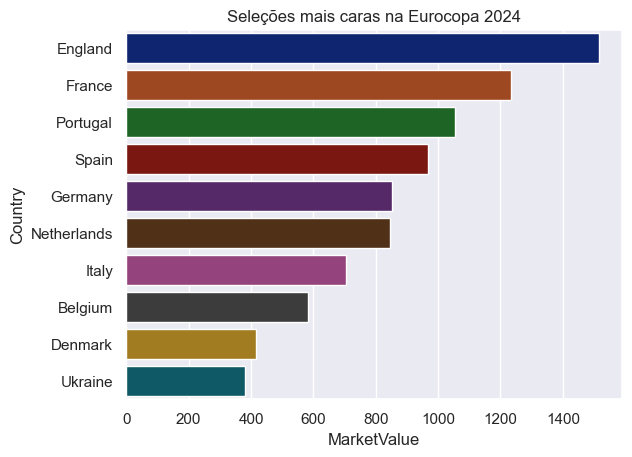

In [28]:
a = df.groupby('Country').agg({'MarketValue': sum})
a['MarketValue']=(a['MarketValue']/1000000).round(0)
a.sort_values(by='MarketValue',ascending=False).head(10).reset_index()

ax = sns.barplot(data=a.sort_values(by='MarketValue',ascending=False).head(10), x='MarketValue', y='Country', palette='dark')
plt.title('Seleções mais caras na Eurocopa 2024')

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\3223403925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=contagem_clubes, x='count', y='Club', palette='dark')


Text(0.5, 1.0, 'Times que mais cederam jogadores na Eurocopa 2024')

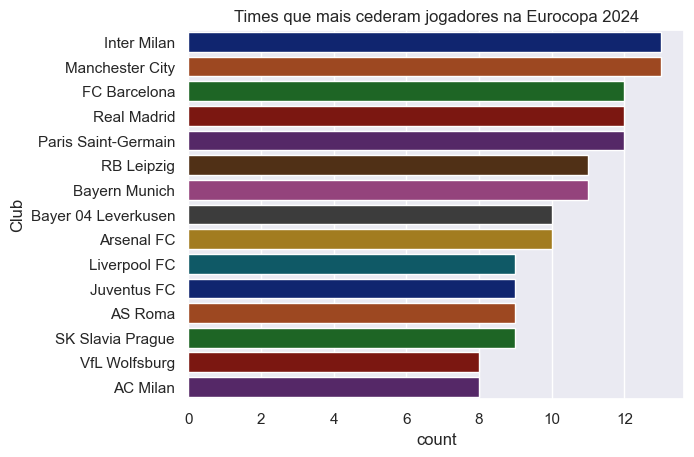

In [29]:
# Plota os 20 times com mais jogadores cedidos para a Eurocopa
contagem_clubes = df['Club'].value_counts()
contagem_clubes = contagem_clubes.to_frame().head(15).reset_index()

ax = sns.barplot(data=contagem_clubes, x='count', y='Club', palette='dark')
plt.title('Times que mais cederam jogadores na Eurocopa 2024')

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\2629675421.py:2: FutureWarning: The provided callable <function mean at 0x0000012F98843380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  markValue_por_pos = df.groupby('Position').agg({'MarketValue': np.mean}).round(2).sort_values(by='MarketValue', ascending=False)


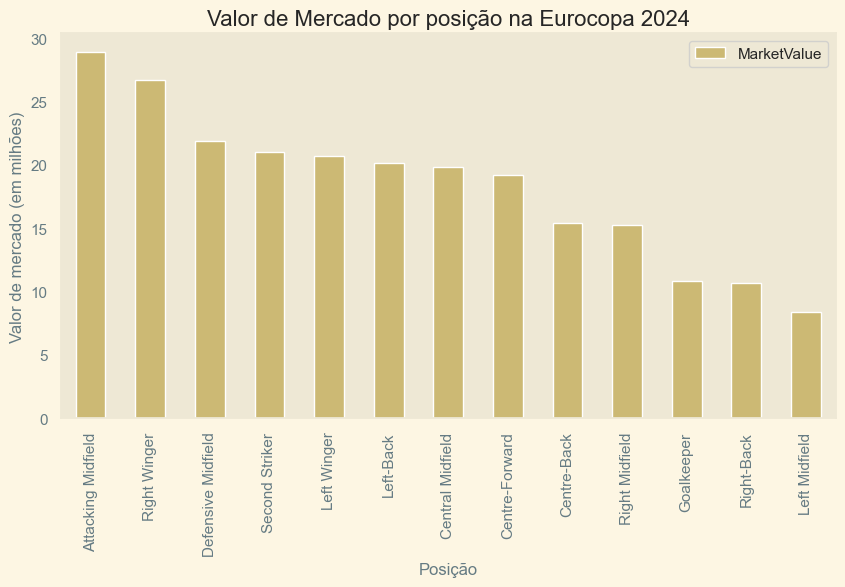

In [30]:
plt.style.use('Solarize_Light2')
markValue_por_pos = df.groupby('Position').agg({'MarketValue': np.mean}).round(2).sort_values(by='MarketValue', ascending=False)
markValue_por_pos['MarketValue'] = markValue_por_pos['MarketValue']/1000000
markValue_por_pos.plot(kind='bar', subplots=True,ylabel= 'Valor de mercado (em milhões)', xlabel='Posição', color='y', figsize=(10,5))
plt.grid(False)
plt.title('Valor de Mercado por posição na Eurocopa 2024')
plt.show()

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\2184157920.py:1: FutureWarning: The provided callable <function mean at 0x0000012F98843380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  idade_selecoes = df.groupby('Country').agg({'Age': np.mean}).round(2).sort_values(by='Age', ascending=True)


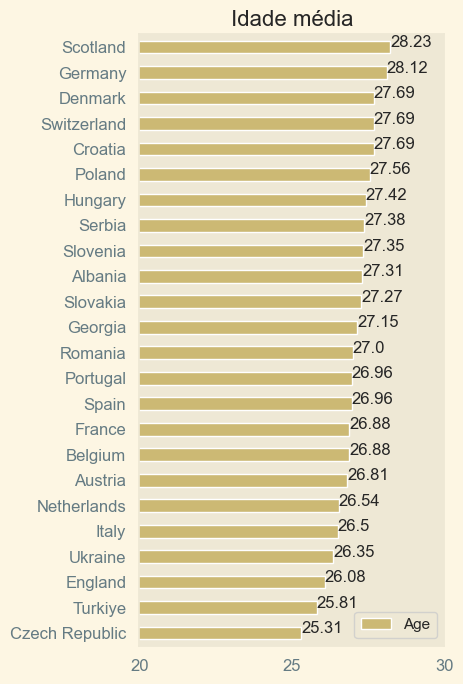

In [31]:
idade_selecoes = df.groupby('Country').agg({'Age': np.mean}).round(2).sort_values(by='Age', ascending=True)
idade_selecoes.plot(kind='barh', subplots=True,ylabel= 'Idade', color='y',xticks=[15,20,25,30],xlim=(20,30), figsize=(5,7))
for index, valor in enumerate(idade_selecoes['Age']):
    plt.text(valor,index, str(valor))
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(False)
plt.legend(loc=4)
plt.tight_layout()

plt.ylabel('')
plt.title('Idade média')
plt.show()

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\1156985614.py:1: FutureWarning: The provided callable <function mean at 0x0000012F98843380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  altura_por_pos = df.groupby('Position').agg({'Height': np.mean}).round(2).sort_values(by='Height', ascending=True)


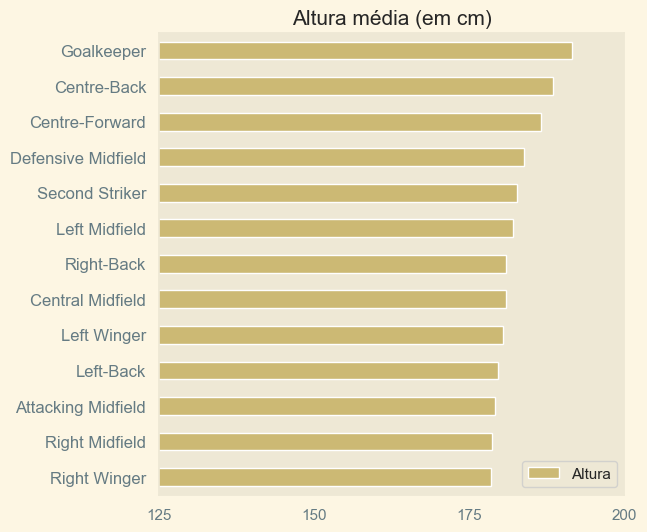

In [32]:
altura_por_pos = df.groupby('Position').agg({'Height': np.mean}).round(2).sort_values(by='Height', ascending=True)
altura_por_pos.rename(columns={'Height': 'Altura'},inplace=True)
altura_por_pos.plot(kind='barh', subplots=True, color='y',xticks=[125,150,175,200],xlim=(125,200), figsize=(6,6),legend= 'Altura')
plt.yticks(size = 12)
plt.grid(False)
plt.ylabel('')
plt.title('Altura média (em cm)',fontsize=15)
plt.show()

In [33]:
import requests
import pandas as pd

# Fazer uma solicitação à API REST Countries para obter informações sobre todos os países
response = requests.get("https://restcountries.com/v3.1/all")
data = response.json()

# Extrair o nome do país e a população
countries_population = []
for country in data:
    name = country.get('name', {}).get('common', None)
    population = country.get('population', None)
    if name and population is not None:
        countries_population.append({'Country': name, 'População': population})

# Criar um DataFrame do Pandas com os dados extraídos
df_population = pd.DataFrame(countries_population)

df_merged = pd.merge(a,df_population, on="Country", how="inner")
df2=df_merged.sort_values(by='População',ascending=False)
df2['Ratio']=((df2['MarketValue']/df2['População'])*1000000).round(0)
df2

,Country,MarketValue,População,Ratio
7,Germany,851.0,83240525,10.0
5,France,1234.0,67391582,18.0
9,Italy,706.0,59554023,12.0
17,Spain,966.0,47351567,20.0
19,Ukraine,379.0,44134693,9.0
11,Poland,212.0,37950802,6.0
13,Romania,92.0,19286123,5.0
10,Netherlands,845.0,16655799,51.0
2,Belgium,584.0,11555997,51.0
12,Portugal,1054.0,10305564,102.0


Regressão dos dados

In [34]:
# Set quais são os Y e Xs regressão
y = df["MarketValue"]

df = df.assign(Squared_Age = lambda x: x.Age ** 2) # Expressão Lambda para criar uma coluna com idade ao quadrado

x = df[['Squared_Age', 'Caps', 'Goals', 'Height']]

x = sm.add_constant(x)

resultados = sm.OLS(y, x).fit()

print(resultados.summary()) # Print os resultados alcançados

                            OLS Regression Results                            
Dep. Variable:            MarketValue   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     36.78
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.34e-27
Time:                        23:10:39   Log-Likelihood:                -11411.
No. Observations:                 623   AIC:                         2.283e+04
Df Residuals:                     618   BIC:                         2.285e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.923e+07   2.47e+07      2.395      

<Axes: xlabel='Age', ylabel='MarketValue'>

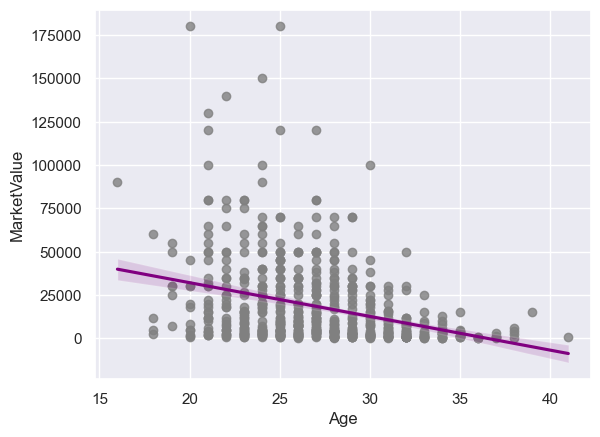

In [35]:
sns.set_theme()
sns.regplot(data=df, x='Age', y=df['MarketValue'].div(1000), fit_reg=True, marker='o', scatter_kws=dict(color='gray'), line_kws=dict(color="purple"))

<Axes: xlabel='Goals', ylabel='MarketValue'>

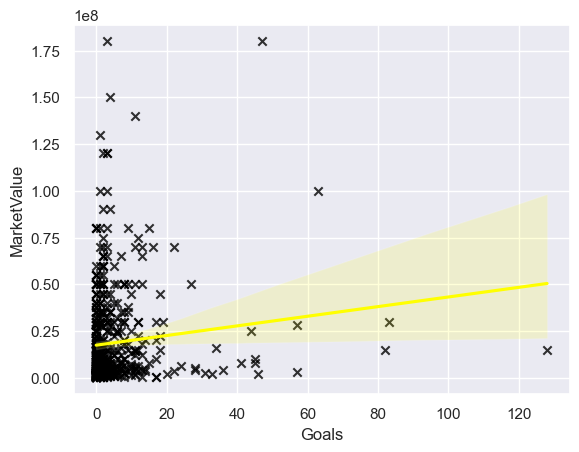

In [36]:
sns.regplot(data=df, x='Goals', y='MarketValue', fit_reg=True, marker='x', scatter_kws=dict(color='Black'), line_kws=dict(color="Yellow"))

In [37]:
def retorna_escalacao(pais):
    """
    Retorna a lista de convocação do país selecionado

    :param pais: o país que usuário deseja ver a convocação
    :return: Uma lista de tupla com as informações nome do jogador, posição e time que ele joga
    """
    if pais in df['Country'].values:
        dados = df.query(f"Country in '{pais}'") # Filtra os dados apenas para o pais selecionado

        lista_escalacao = [(jogador, posicao, time) for jogador,posicao,time in zip(dados['Name'], dados['Position'], dados['Club'])] # List comprehension

        return lista_escalacao
    else:
        return print(f'O país {pais} não participa da Eurocopa 2024')

retorna_escalacao('France')

[('Mike Maignan', 'Goalkeeper', 'AC Milan'),
 ('Brice Samba', 'Goalkeeper', 'RC Lens'),
 ('Alphonse Areola', 'Goalkeeper', 'West Ham United'),
 ('William Saliba', 'Centre-Back', 'Arsenal FC'),
 ('Benjamin Pavard', 'Centre-Back', 'Inter Milan'),
 ('Dayot Upamecano', 'Centre-Back', 'Bayern Munich'),
 ('Jules Koundé', 'Centre-Back', 'FC Barcelona'),
 ('Ibrahima Konaté', 'Centre-Back', 'Liverpool FC'),
 ('Theo Hernández', 'Left-Back', 'AC Milan'),
 ('Ferland Mendy', 'Left-Back', 'Real Madrid'),
 ('Jonathan Clauss', 'Right-Back', 'Olympique Marseille'),
 ('Aurélien Tchouaméni', 'Defensive Midfield', 'Real Madrid'),
 ("N'Golo Kanté", 'Defensive Midfield', 'Al-Ittihad Club'),
 ('Eduardo Camavinga', 'Central Midfield', 'Real Madrid'),
 ('Warren Zaïre-Emery', 'Central Midfield', 'Paris Saint-Germain'),
 ('Adrien Rabiot', 'Central Midfield', 'Juventus FC'),
 ('Youssouf Fofana', 'Central Midfield', 'AS Monaco'),
 ('Kingsley Coman', 'Left Winger', 'Bayern Munich'),
 ('Bradley Barcola', 'Left Winge

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o seu DataFrame tenha as colunas 'Nome', 'País', 'Posição', 'Valor de Mercado'
# Certifique-se de que df está carregado corretamente antes de usar
# df = pd.read_csv('seu_arquivo.csv')  # Exemplo de como carregar um DataFrame

# Lista de posições necessárias para a formação 4-3-3
positions_4_3_3 = ['Goalkeeper'] 
position_2cb= ['Centre-Back','Central Midfield']
position_else=['Right-Back', 'Left-Back', 'Defensive Midfield', 'Left Winger', 'Right Winger', 'Centre-Forward']

# Função para obter os jogadores para a formação 4-3-3
def get_best_players(df, country):
    selected_players = []
    for position in positions_4_3_3:
        players_in_position = df[(df['Country'] == country) & (df['Position'] == position)].nlargest(1, 'MarketValue')
        selected_players.append(players_in_position)
    for position in position_2cb:
        players_in_position = df[(df['Country'] == country) & (df['Position'] == position)].nlargest(2, 'MarketValue')
        selected_players.append(players_in_position)
    for position in position_else:
        players_in_position = df[(df['Country'] == country) & (df['Position'] == position)].nlargest(1, 'MarketValue')
        selected_players.append(players_in_position)
    return pd.concat(selected_players)

# Interface do Streamlit


def escalação(country):
    best_players = get_best_players(df, country)
    
    if best_players.empty:
        print(f"Não há jogadores disponíveis para o país selecionado: {country}")
    else:
        
        # Visualização da formação 4-3-3
        fig, ax = plt.subplots()
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        ax.axis('off')

        positions_coordinates = {
            'Goalkeeper': (5, 1),
            'Centre-Back1': (3, 3),
            'Centre-Back2':(7, 3),
            'Left-Back': (1, 4),
            'Right-Back': (9, 4),
            'Defensive Midfield': (5, 5),
            'Central Midfield1': (3, 6),
            'Central Midfield2': (7, 6),
            'Left Winger': (2, 9), 
            'Centre-Forward': (5, 8),
            'Right Winger': (8, 9)
        }

        # Ajustar as posições para corresponder ao número de jogadores
        best_players['PositionAdjusted'] = best_players['Position']
        if 'Centre-Back' in best_players['Position'].values:
            indices = best_players[best_players['Position'] == 'Centre-Back'].index
            if len(indices) > 1:
                best_players.at[indices[0], 'PositionAdjusted'] = 'Centre-Back1'
                best_players.at[indices[1], 'PositionAdjusted'] = 'Centre-Back2'
        if 'Central Midfield' in best_players['Position'].values:
            indices = best_players[best_players['Position'] == 'Central Midfield'].index
            if len(indices) > 1:
                best_players.at[indices[0], 'PositionAdjusted'] = 'Central Midfield1'
                best_players.at[indices[1], 'PositionAdjusted'] = 'Central Midfield2'

        for _, player in best_players.iterrows():
            posicao = player['PositionAdjusted']
            nome = player['Name']
            if posicao in positions_coordinates:
                coord = positions_coordinates[posicao]
                ax.text(coord[0], coord[1], nome, ha='center', va='center', bbox=dict(facecolor='blue', alpha=0.5))

        plt.show()

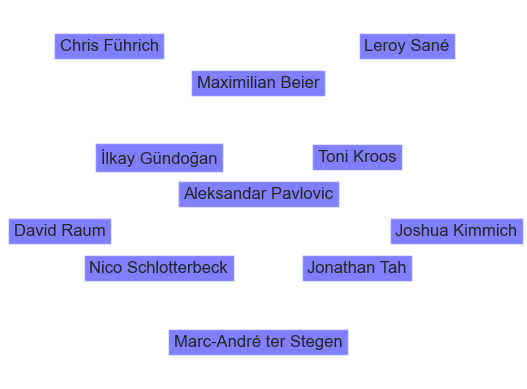

In [39]:
escalação('Germany')

In [40]:
valor_selecao = df.groupby('Country').agg({'MarketValue': np.sum})
valor_selecao.rename(index={'England': 'United Kingdom', 'Turkiye': 'Turkey', 'Serbia': 'Republic of Serbia',}, inplace=True)
valor_selecao['MarketValue'] = valor_selecao['MarketValue']/1000000000
valor_selecao['name']=valor_selecao.index
valor_selecao

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\1076017601.py:1: FutureWarning: The provided callable <function sum at 0x0000012F988422A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  valor_selecao = df.groupby('Country').agg({'MarketValue': np.sum})


,MarketValue,name
Country,,
Albania,0.111600,Albania
Austria,0.235500,Austria
Belgium,0.584500,Belgium
Croatia,0.327700,Croatia
Czech Republic,0.193900,Czech Republic
Denmark,0.415500,Denmark
United Kingdom,1.515000,United Kingdom
France,1.234000,France
Georgia,0.160150,Georgia


In [41]:
import folium
import requests
world = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
).json()
m = folium.Map([53, 9], zoom_start=4)

folium.Choropleth(
    geo_data=world,
    data=valor_selecao,
    columns=["name","MarketValue"],
    nan_fill_color="black",
    nan_fill_opacity=0.1,
    key_on="feature.properties.name",
    fill_color="RdBu",
    legend_name="Valor médio da seleção (em bilhão)"
).add_to(m)
m


In [42]:
len(world['features'])
paises_world = []
soma = 0
for i in range(len(world['features'])):
    if world['features'][i]['properties']['name'] in valor_selecao['name']:
        #print(world['features'][i]['properties']['name'])
        paises_world.append(world['features'][i]['properties']['name'])
        soma += 1
print(len(paises_world))


23


In [43]:
for i in range(len(valor_selecao)):
    if valor_selecao['name'][i] not in paises_world:
        print(valor_selecao['name'][i])

Scotland


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\1170908025.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if valor_selecao['name'][i] not in paises_world:
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_5132\1170908025.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(valor_selecao['name'][i])
